# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df1 = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

df1['flag_doente'] = (df1['num']!=0).astype('int64')

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

## 1) Considere o script que monta a análise bivariada que você fez na tarefa anterior. 

In [3]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


### 1.1 Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 

In [4]:
def analise_bivar_quali(df: pd.DataFrame, var_res: str, var_exp: str) -> pd.DataFrame:
    
    tab = pd.crosstab(df[var_exp], df[var_res], margins= True)

    tab['Média'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])

    return tab

### 1.2 Monte a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. 

In [5]:
analise_bivar_quali(df = df1, var_res = 'flag_doente', var_exp = 'cp')


flag_doente,0,1,All,Média,Odds,Odds ratio,Logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [6]:
analise_bivar_quali(df = df1, var_res = 'flag_doente', var_exp = 'restecg')

flag_doente,0,1,All,Média,Odds,Odds ratio,Logito,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [7]:
analise_bivar_quali(df = df1, var_res = 'flag_doente', var_exp = 'slope')

flag_doente,0,1,All,Média,Odds,Odds ratio,Logito,WOE
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706,-1.079920,-0.914528
2.0,49,91,140,0.650000,1.857143,2.191161,0.619039,0.784432
3.0,9,12,21,0.571429,1.333333,1.573141,0.287682,0.453075
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


### 1.3 Qual delas parece discriminar mais o risco?

**Resposta:** 'cp' parace ser a variável que melhor consegue discriminar o risco, pois ela tem uma variável que possui um risco claramente mais alto (cp=4 que 72% de ocorrência de doentes) e as outras relativamente baixas (cp=1 possui 30%, cp=2 possui 18% e cp=3 possui 20%). 

A variável 'resteg' não parece ser uma variável tão boa pois sua categoria de 'resteg=1' possui apenas quatro observações e as outras não estão tão distantes de 50% quanto as de 'cp'.

A variável 'slope' parece ser melhor que 'resteg', mas 'cp' parece melhor.

## 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  

### Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def analise_bivar_quant(df: pd.DataFrame, var_res: str, var_exp: str, divisao: int = 5) -> pd.DataFrame:
    
    df['cut'] = pd.qcut(df[var_exp], divisao)
    tab = pd.crosstab(df['cut'], df[var_res], margins= True)

    tab['Qnt. média doentes'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])
    tab['Média'] = df[['cut',var_exp]].groupby('cut').mean()
    tab.loc['All','Média'] = df[var_exp].mean()
    
    df.drop('cut', axis=1, inplace=True)

    return tab

In [9]:
analise_bivar_quant(df = df1, var_res = 'flag_doente', var_exp = 'age')

flag_doente,0,1,All,Qnt. média doentes,Odds,Odds ratio,Logito,WOE,Média
cut,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.438944


## 3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.



In [10]:
reglog = smf.logit("flag_doente ~ sex + cp + trestbps + age", data=df1).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.2605
Time:                        17:25:11   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

### 3.1 Interprete os parâmetros.

**Resposta:** Todos os coeficientes da regressão são estatisticamente significantes (P>|z| menores que 0.05). O Intercept tem um valor negativo, o que quer diver que o valor de eta seria negativo caso sex=0 (female), cp = 0, trestbps=0 e age=0. No entanto, trestbps e age nunca são igual a zero. Treststbps varia de 94 a 200 e age varia de 29 a 77.

Apesar de o enunciado ter pedido a variável trestbp como qualitativa, ela possui variáveis demais para consideramos dessa forma (exceto se dividirmos em faixas).

Em resumo: 
- sex: homens tendem a ter mais doenças cardiácas que mulheres
- cp: o tipo de dor no peito aumenta a chance de ter doença cardíaca conforme a seguinte ordem: 
    1: angina típica
    < 2: angina atípica
    < 3: dor não-angina
    < 4: assintomático
- trestbps: o quanto maior a pressão sanguínea em repouso, mais chance de ter doença cardíaca
- age: o quanto maior a idade , mais chance de ter doença cardíaca

## 4. Avalie o seu modelo quanto a **calibragem**:

### 4.1 Calcule a probabilidade de evento predita segundo o seu modelo

In [11]:
df1['predito'] = reglog.predict(df1)

### 4.2 Categorize essa probabilidade em G=5 grupos

In [12]:
cat_pred = pd.qcut(df1['predito'], 5, duplicates='drop') #categoriza
cat_pred.value_counts().sort_index() #contabiliza

predito
(0.0119, 0.146]    61
(0.146, 0.349]     60
(0.349, 0.575]     61
(0.575, 0.772]     60
(0.772, 0.928]     61
Name: count, dtype: int64

### 4.3 Calcule a probabilidade de evento predita média por grupo

In [13]:
#Criando o groupby
group_reg = df1.groupby(cat_pred)

# Aqui calculamos a média do predito de cada categoria.
qualid = group_reg[['predito']].mean().rename(columns = {'predito': 'media predito'})
qualid

,media predito
predito,
"(0.0119, 0.146]",0.076255
"(0.146, 0.349]",0.249060
"(0.349, 0.575]",0.457982
"(0.575, 0.772]",0.673059
"(0.772, 0.928]",0.837449


### 4.4 Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo

In [14]:
# Como a variável resposta é binária (0 ou 1), a média dela já vai ser a porctentagem de quantos sofreviveram.
qualid['pct_sobrev'] = group_reg['flag_doente'].mean()
qualid

,media predito,pct_sobrev
predito,,
"(0.0119, 0.146]",0.076255,0.098361
"(0.146, 0.349]",0.249060,0.183333
"(0.349, 0.575]",0.457982,0.491803
"(0.575, 0.772]",0.673059,0.683333
"(0.772, 0.928]",0.837449,0.836066


### 4.5 Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

Text(0.5, 0, 'Grupo')

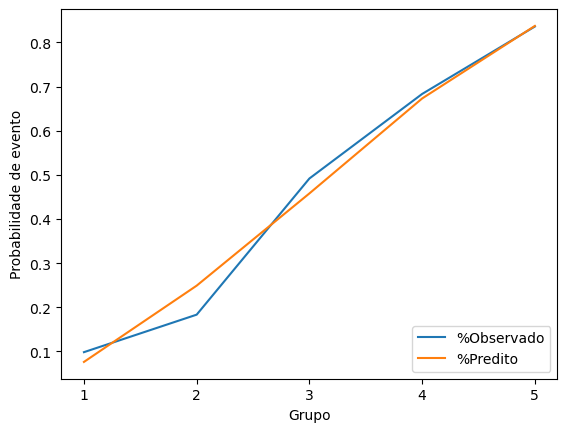

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sobrev'].plot(label='%Observado')
ax = qualid['media predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

## 5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [16]:
# Acurácia
# Aqui ele está considerando se a chance de sobreviver foi maior que 50% ele sobreviveu
from sklearn import metrics
acc = metrics.accuracy_score(df1['flag_doente'], df1['predito']>.5) 

# AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df1['flag_doente'], df1['predito'])
auc_ = metrics.auc(fpr, tpr)

# Gini
gini = 2*auc_ -1

# KS
from scipy.stats import ks_2samp

ks = ks_2samp(df1.loc[df1['flag_doente'] == 1, 'predito'], #retorna os valores da coluna 'predito' dos sobreviventes
              df1.loc[df1['flag_doente'] != 1, 'predito']).statistic

#printando
print('Acurácia: {0:.2f}% \nGINI: {2:.2f}% \nKS: {0:.2f}%'
      .format(acc*100, ks*100, gini*100))

Acurácia: 77.89% 
GINI: 66.22% 
KS: 77.89%


## 6. Tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  Avalie as características do seu modelo (calibragem e acurácia).

In [17]:
reglog = smf.logit('''flag_doente 
                   ~ sex 
                   + cp
                   + (ca == '1.0')
                   + (ca == '2.0')
                   + (ca == '3.0')
                   + trestbps
                   ''', data=df1).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.441330
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.3601
Time:                        17:25:12   Log-Likelihood:                -133.72
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.960e-30
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.5366      1.553     -6.140      0.000     -12.581      -6.492
ca == '1.0'[T.True]     1.8281      0.377      4.850      0.000       1.089       2.567
ca == '2.0'[T.True]     2.7427      0.554      4.952      0.000       1.657       3.828
ca == '3.0'[T.True]     2.1745      0.672      3.238      0.001       0.858       3.491
sex                     1.6812      0.356      4.725      0.000       0.984       2.379
cp                      1.0829      0.180      6.000      0.000       0.729       1.437
trestbps                0.0291      0.009      3.192      0.001       0.011       0.047
=======================================================================================
"""

In [18]:
df1['predito'] = reglog.predict(df1)

In [19]:
# Calibragem
qualid['media predito'] = group_reg['predito'].mean()
qualid['pct_sobrev'] = group_reg['flag_doente'].mean()
qualid

,media predito,pct_sobrev
predito,,
"(0.0119, 0.146]",0.094840,0.098361
"(0.146, 0.349]",0.212805,0.183333
"(0.349, 0.575]",0.488218,0.491803
"(0.575, 0.772]",0.675251,0.683333
"(0.772, 0.928]",0.822133,0.836066


In [20]:
# Acurácia
# Aqui ele está considerando se a chance de sobreviver foi maior que 50% ele sobreviveu
from sklearn import metrics
acc = metrics.accuracy_score(df1['flag_doente'], df1['predito']>.5) 

#printando
print('Acurácia: {0:.2f}%'
      .format(acc*100))

Acurácia: 78.22%
